# PART 3
## Normalize data

Scran normalization: since the cell types show intrinsic differences in library sizes, we will running the normalzation on each cell type separately.

- **INPUT:**
    - ```counts_cf_ctf_gf_sf.RData``` 
    - ```anno_cells_cf_ctf_gf_sf.RData```
    - ```anno_samples_cf_ctf_gf_sf.RData```
    - ```anno_genes_cf_ctf_gf_sf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
    
- **OUTPUT:**

    -  ```counts_norm.mtx``` 
    -  ```anno_cells_norm.txt``` 
    -  ```anno_samples_norm.txt``` 
    -  ```anno_genes_norm.txt``` 

### load data

In [1]:
library(ggplot2)
library(SingleCellExperiment)
library(scran)
library(scater)
library(Matrix)

Lade nötiges Paket: SummarizedExperiment

Lade nötiges Paket: MatrixGenerics

Lade nötiges Paket: matrixStats


Attache Paket: ‘MatrixGenerics’


Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowS

In [2]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install(c("SingleCellExperiment","scran","scater"))

In [3]:
path_to_additional_files="/work/project/ladcol_013/algo_ulc/pdata/"

In [4]:
# load cell relabelling file
print("load cell_relabelling")
file="cell_relabelling.csv"
cell_relabelling <- read.csv(file = paste(path_to_additional_files, file, sep="")
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

[1] "load cell_relabelling"
'data.frame':	51 obs. of  6 variables:
 $ cell_type_original      : chr  "Stem" "TA 1" "TA 2" "Cycling TA" ...
 $ tissue_type             : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
 $ cell_type_original_color: chr  "#CB4335" "#CB4335" "#CB4335" "#CB4335" ...
 $ cell_type_color         : chr  "#CB4335" "#CB4335" "#CB4335" "#CB4335" ...
 $ population_shape        : int  19 19 19 19 19 19 19 19 19 19 ...
 $ cell_type               : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
NULL


In [5]:
getwd()

[1] "/work/project/ladcol_013/algo_ulc"

In [6]:
# load counts
print("load counts")
load("./pdata/counts_cf_ctf_gf_sf.RData")
print("dim(counts_cf_ctf_gf_sf)")
print(dim(counts_cf_ctf_gf_sf))

[1] "load counts"
[1] "dim(counts_cf_ctf_gf_sf)"
[1] 13146 80911


In [7]:
# load cell annotation
print("load cell annotation")
load("./pdata/anno_cells_cf_ctf_gf_sf.RData")
print("str(anno_cells_cf_ctf_gf_sf)")
print(str(anno_cells_cf_ctf_gf_sf))

[1] "load cell annotation"
[1] "str(anno_cells_cf_ctf_gf_sf)"
'data.frame':	80911 obs. of  22 variables:
 $ cell_ID                      : chr  "N10.LPA.TTGCTATGACGCAT" "N13.LPA.AACCTTACTGCTTT" "N13.LPA.ACAATCCTCTGAAC" "N13.LPA.AGTGACTGGATACC" ...
 $ cell_type_original           : chr  "Stem" "Stem" "Stem" "Stem" ...
 $ tissue_type                  : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
 $ cell_type                    : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
 $ region                       : chr  "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ sample_ID                    : chr  "N10.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" ...
 $ total_counts_raw             : num  8269 5413 6372 6946 3485 ...
 $ nr_genes                     : int  1554 1219 1336 1303 945 1031 470 1502 1779 1188 ...
 $ counts_upper_threshold       : num  30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 ...
 $ counts_lower_threshold      

In [8]:
# load sample annotation
print("load sample annotation")
load("./pdata/anno_samples_cf_ctf_gf_sf.RData")
print("str(anno_samples_cf_ctf_gf_sf)")
print(str(anno_samples_cf_ctf_gf_sf))

[1] "load sample annotation"
[1] "str(anno_samples_cf_ctf_gf_sf)"
'data.frame':	67 obs. of  12 variables:
 $ sample_ID                    : chr  "N10.LPA_Healthy" "N10.LPB_Healthy" "N13.LPA_Healthy" "N13.LPB_Healthy" ...
 $ patient_ID                   : chr  "N10" "N10" "N13" "N13" ...
 $ region                       : chr  "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ case_or_control              : chr  "control" "control" "control" "control" ...
 $ health_status                : chr  "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ nr_cells_raw                 : int  4635 5102 1782 1828 1896 1542 1185 2288 1445 2230 ...
 $ nr_cells_cf                  : int  2824 3141 1046 1181 1074 806 796 1131 774 1425 ...
 $ nr_cells_cf_ctf              : int  2802 3040 1044 1181 1065 797 792 1124 772 1415 ...
 $ total_counts_raw_cf_ctf_gf   : num  8163510 8279658 3383881 3386692 3278561 ...
 $ nr_celltypes_cf_ctf_gf       : int  8 8 7 7 8 8 7 8 8 8 ...
 $ threshold_nr_celltypes       : chr  "grea

In [9]:
# load gene annotation
print("load gene annotation")
load("./pdata/anno_genes_cf_ctf_gf_sf.RData")
print("str(anno_genes_cf_ctf_gf_sf)")
print(str(anno_genes_cf_ctf_gf_sf))

[1] "load gene annotation"
[1] "str(anno_genes_cf_ctf_gf_sf)"
'data.frame':	13146 obs. of  7 variables:
 $ gene_symbol                          : chr  "A1BG-AS1" "A1CF" "A2M" "A4GALT" ...
 $ inDB                                 : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ isLigand                             : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ isReceptor                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sum_pseudobulkCellType_expr          : num  7.86 21.39 614.63 36.31 41.64 ...
 $ sum_pseudobulkCellType_expr_threshold: num  5 5 5 5 5 5 5 5 5 5 ...
 $ sum_pseudobulkCellType_expr_filter   : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
NULL


In [10]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data 

In [11]:
counts_norm <- counts_cf_ctf_gf_sf

In [12]:
# normalize each cell type separately with scran
for(cluster in unique(anno_cells_cf_ctf_gf_sf$cell_type)){
    print(cluster)
  
    idx_cluster <- anno_cells_cf_ctf_gf_sf$cell_type == cluster

    # subset anno_cells_cf_ctf_gf_sf
    anno_cells_sub <- anno_cells_cf_ctf_gf_sf[idx_cluster,]

    # create SingleCellExperiment object
    print("create SingleCellExperiment object")
    original_sce <- SingleCellExperiment(
    assays = list(counts = as.matrix(counts_cf_ctf_gf_sf[,idx_cluster]))
    ,colData = anno_cells_sub
    )

    # comupte size factors
    print("compute size factors")
    original_sce <- computeSumFactors(original_sce
                                    #,cluster=cluster 
    )

    anno_cells_cf_ctf_gf_sf$sizeFactor[idx_cluster] <- sizeFactors(original_sce)

    # normalize
    print("scran normalization")
    original_sce <- logNormCounts(original_sce
                                ,log = FALSE
                                )
    counts_norm[,idx_cluster] <- original_sce@assays@data@listData$normcounts
}


[1] "Epithelial"
[1] "create SingleCellExperiment object"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "Fibroblasts"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Endothelial"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Myeloid"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Mast"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "T-cells"
[1] "create SingleCellExperiment object"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "Plasma"
[1] "create SingleCellExperiment object"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "B-cells"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"


### visualize 

[1] "construct pseudo bulks for cell types"
[1] "str(counts_pseudobulkCellType)"
'data.frame':	13146 obs. of  238 variables:
 $ Epithelial_N10.LPA_Healthy        : num  0 0.1864 0.0339 0 0.0847 ...
 $ Epithelial_N13.LPA_Healthy        : num  0 0.0563 0.0106 0 0.0282 ...
 $ Epithelial_N15.LPA_Healthy        : num  0 0.2982 0.0702 0 0.1754 ...
 $ Epithelial_N16.LPA_Healthy        : num  0 0 0 0 0.231 ...
 $ Epithelial_N17.LPA_Healthy        : num  0 0.167 0 0 0.25 ...
 $ Epithelial_N18.LPA_Healthy        : num  0 0 0.133 0 0.133 ...
 $ Epithelial_N21.LPA_Healthy        : num  0 0.145 0.0223 0 0.0818 ...
 $ Epithelial_N46.LPA_Healthy        : num  0 0.1959 0.0309 0 0.0619 ...
 $ Epithelial_N51.LPA_Healthy        : num  0 0.075 0.175 0 0.1 0.15 0.1 0.1 0.1 0.35 ...
 $ Epithelial_N20.LPA_Healthy        : num  0 0 0 0 0.2 0 0 0.4 0 0 ...
 $ Fibroblasts_N10.LPA_Healthy       : num  0.0152 0 2.6981 0.0405 0.0658 ...
 $ Fibroblasts_N13.LPA_Healthy       : num  0 0 2.1507 0.137 0.0411 ...
 $ Fib

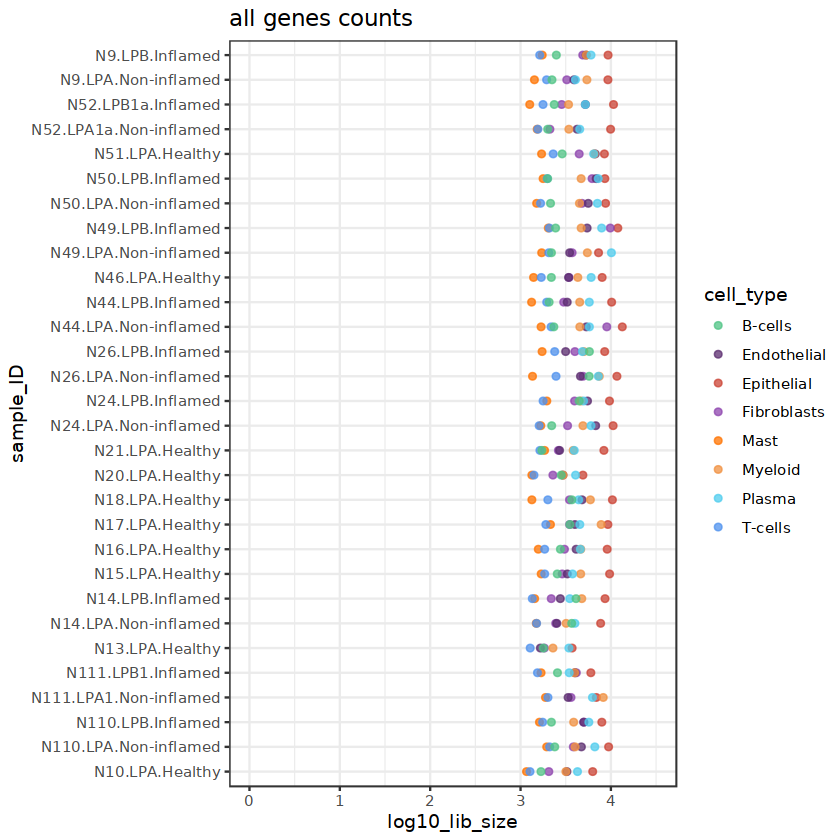

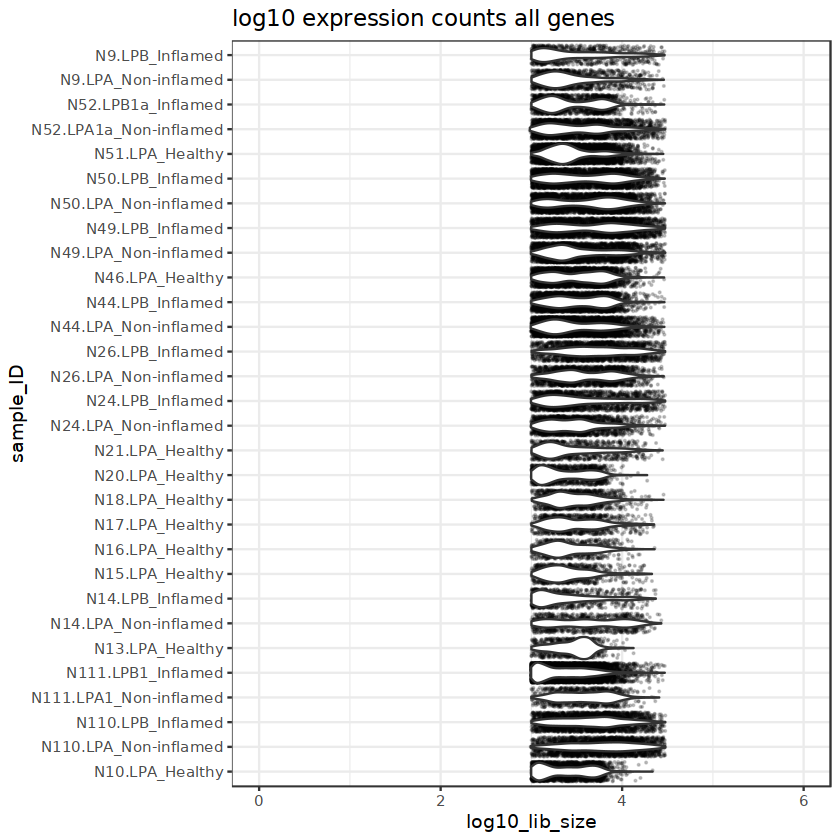

[1] "visualize expression after gene filter"
'data.frame':	80911 obs. of  2 variables:
 $ log10_lib_size: num  2.87 2.65 2.7 2.76 2.41 ...
 $ sample_ID     : chr  "N10.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" ...
NULL


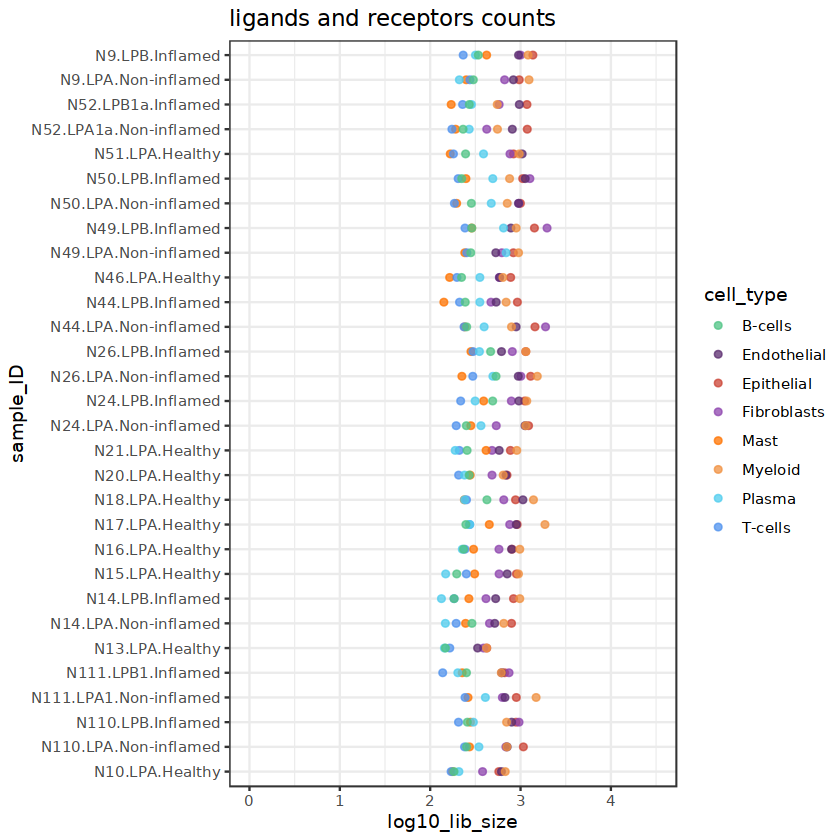

[1] "str(counts_pseudobulkCellType)"
'data.frame':	13146 obs. of  238 variables:
 $ Epithelial_N10.LPA_Healthy        : num  0 0.1979 0.0221 0 0.0868 ...
 $ Epithelial_N13.LPA_Healthy        : num  0 0.1952 0.0296 0 0.0923 ...
 $ Epithelial_N15.LPA_Healthy        : num  0 0.309 0.121 0 0.124 ...
 $ Epithelial_N16.LPA_Healthy        : num  0 0 0 0 0.477 ...
 $ Epithelial_N17.LPA_Healthy        : num  0 0.115 0 0 0.141 ...
 $ Epithelial_N18.LPA_Healthy        : num  0 0 0.0845 0 0.0675 ...
 $ Epithelial_N21.LPA_Healthy        : num  0 0.1942 0.0244 0 0.0849 ...
 $ Epithelial_N46.LPA_Healthy        : num  0 0.2885 0.0957 0 0.0683 ...
 $ Epithelial_N51.LPA_Healthy        : num  0 0.0464 0.5157 0 0.0948 ...
 $ Epithelial_N20.LPA_Healthy        : num  0 0 0 0 0.107 ...
 $ Fibroblasts_N10.LPA_Healthy       : num  0.0294 0 4.6824 0.0615 0.1177 ...
 $ Fibroblasts_N13.LPA_Healthy       : num  0 0 4.778 0.283 0.103 ...
 $ Fibroblasts_N15.LPA_Healthy       : num  0.0641 0 5.6357 0.155 0.1264 ...
 

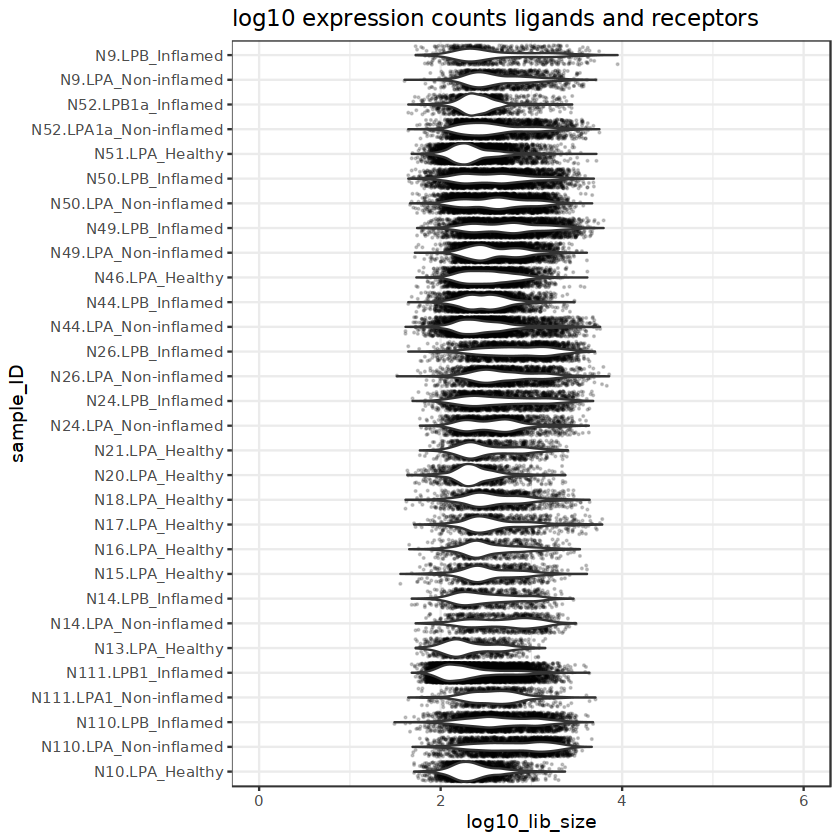

[1] "visualize expression after gene filter"
'data.frame':	80911 obs. of  2 variables:
 $ log10_lib_size: num  4.08 4.01 4 4.05 3.98 ...
 $ sample_ID     : chr  "N10.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" ...
NULL


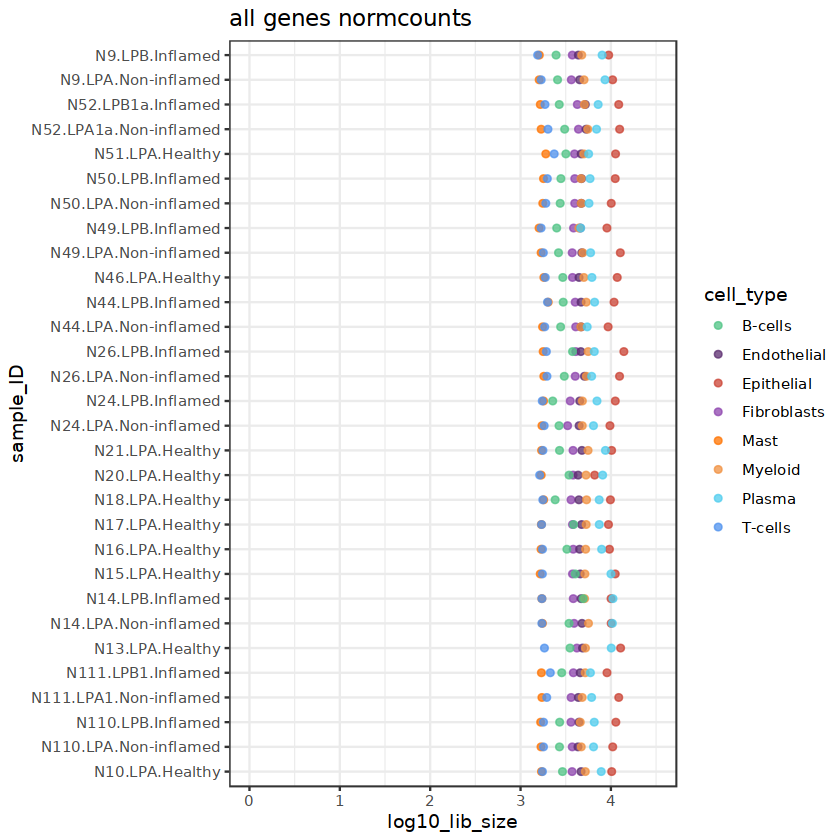

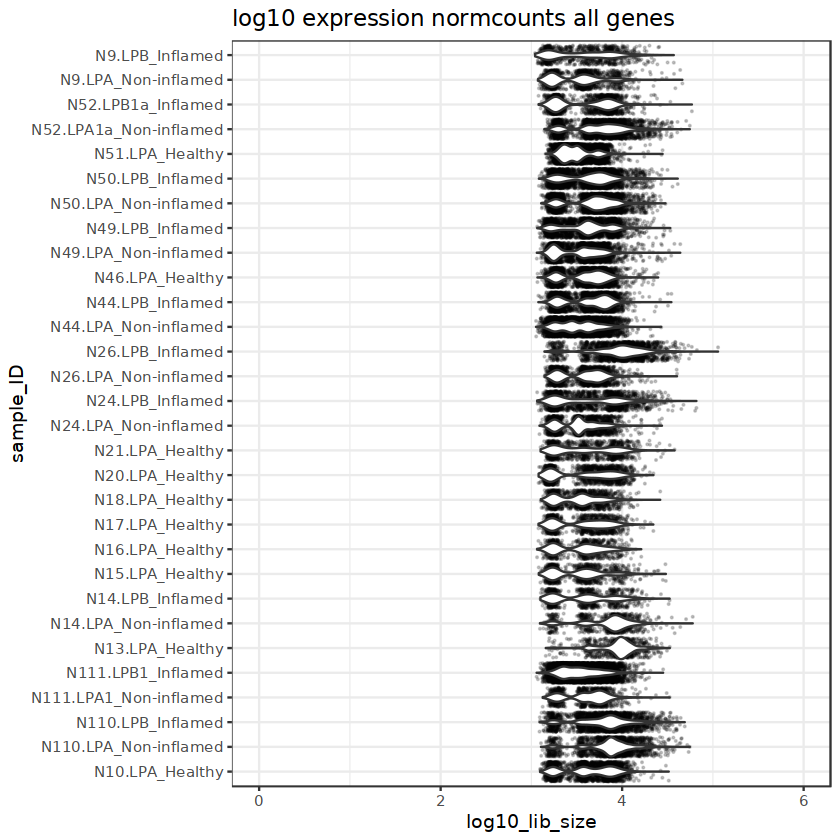

[1] "visualize expression after gene filter"
'data.frame':	80911 obs. of  2 variables:
 $ log10_lib_size: num  3.03 2.92 2.9 2.97 2.84 ...
 $ sample_ID     : chr  "N10.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" "N13.LPA_Healthy" ...
NULL


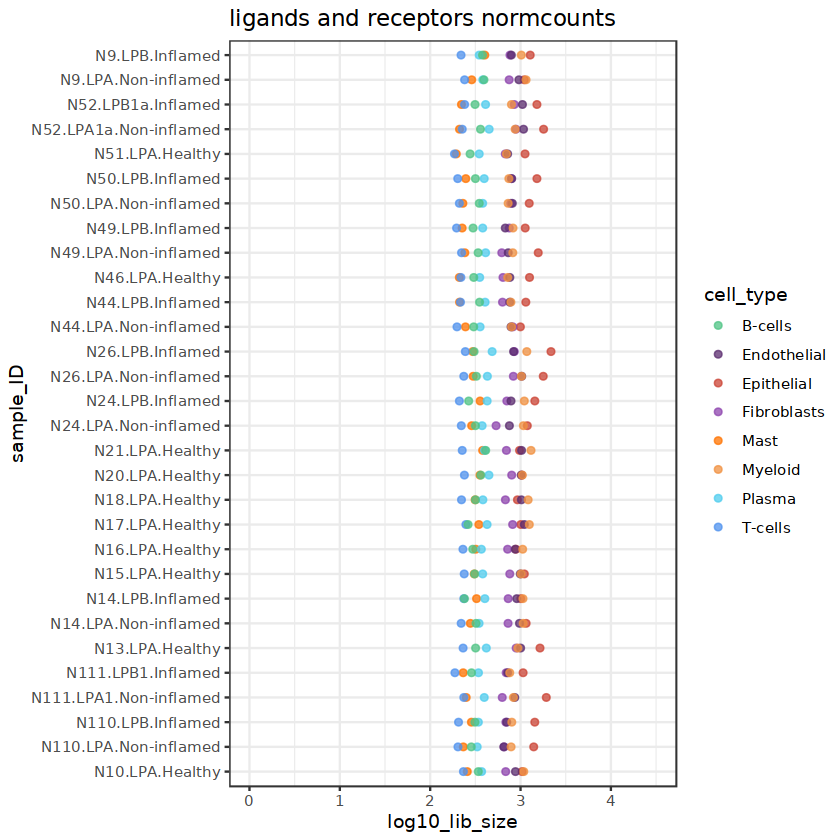

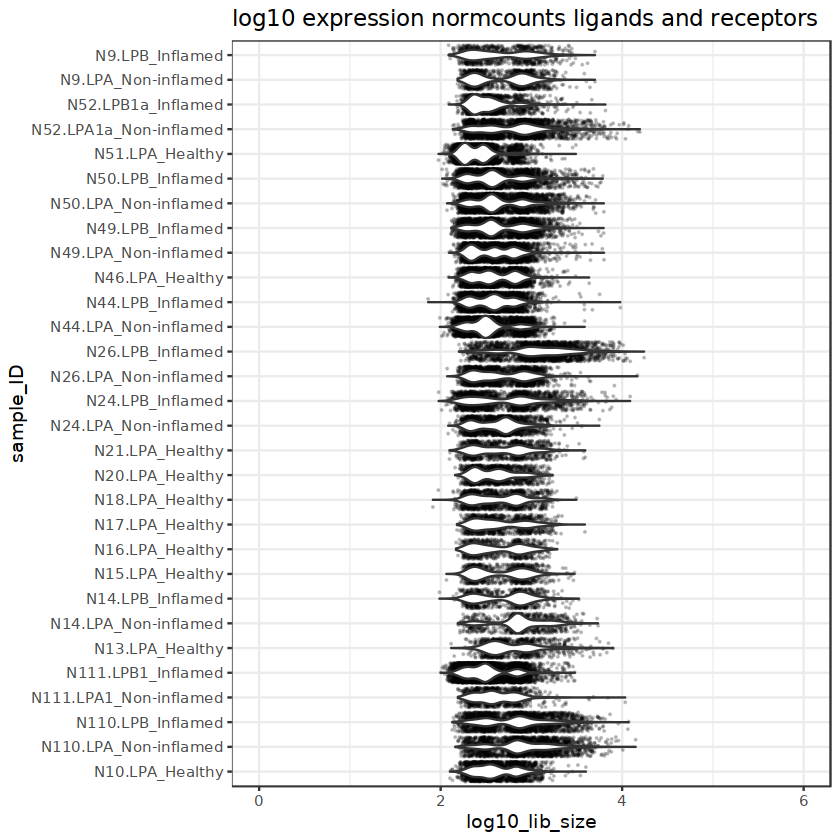

In [13]:
print("construct pseudo bulks for cell types")
for(counts_type in c("counts"
                ,"normcounts")
){
  
  ifelse(counts_type == "counts"
         ,counts <- counts_cf_ctf_gf_sf
         ,counts <- counts_norm)
  
  cell_type_IDs <- unique(anno_cells_cf_ctf_gf_sf$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts)
                                                    ,ncol = length(cell_type_IDs)
  )
  )
  i <- 1
  for(cell_type_ID in cell_type_IDs){
    #print(cell_type_ID)
    
    idx_cell_type_ID <- anno_cells_cf_ctf_gf_sf$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID) == 0){
      counts_pseudobulkCellType[,i] <- 0
    } else if( sum(idx_cell_type_ID) == 1){
      counts_pseudobulkCellType[,i] <- counts[,idx_cell_type_ID]
    } else {
      counts_pseudobulkCellType[,i] <- rowMeans(counts[,idx_cell_type_ID])
    }
    
    i <- i+1
  }
  colnames(counts_pseudobulkCellType) <- cell_type_IDs
  rownames(counts_pseudobulkCellType) <- rownames(counts)
  print("str(counts_pseudobulkCellType)")
  print(str(counts_pseudobulkCellType))
  
  # visualize expression in pseudo sorted bulk
  print("visualize expression in pseudo-bulk cell type")
  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes_cf_ctf_gf_sf))
           ,idx_genes <- anno_genes_cf_ctf_gf_sf$isLigand | anno_genes_cf_ctf_gf_sf$isReceptor
    )
    
    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub("_", ".", sub("^[^_]+_", "", colnames(counts_pseudobulkCellType)))
                     
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,counts_type)) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )
    
    
    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(counts[idx_genes,]) +1)
                     ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
    )
    print(str(df))
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() + 
      ggtitle(paste("log10 expression"
                    ,counts_type
                    ,genes_type)) +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)
    
  }
  
}


In [14]:
anno_cells_norm <- anno_cells_cf_ctf_gf_sf
anno_genes_norm <- anno_genes_cf_ctf_gf_sf
anno_samples_norm <- anno_samples_cf_ctf_gf_sf

### export

In [ ]:
# export ####
print("export")
print("export counts_norm.mtx")
writeMM(obj = Matrix(as.matrix(counts_norm)
                     , sparse=TRUE)
        , file = "./pdata/counts_norm.mtx"
        )

[1] "export"
[1] "export counts_norm.mtx"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 7.9 GiB”


In [ ]:
# export anno_cells_norm
print("export anno_cells_norm.txt")
write.table(anno_cells_norm
            ,file = "./pdata/anno_cells_norm.txt"
             ,sep = "\t"
            ,row.names = FALSE )

In [ ]:
# export anno_genes
print("export anno_genes_norm.txt")
write.table(anno_genes_norm
            ,file = "./pdata/anno_genes_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

In [ ]:
# export anno_samples
print("export anno_samples_norm.txt")
write.table(anno_samples_norm
            ,file = "./pdata/anno_samples_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)